In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris=load_iris()
print(iris.DESCR) #описание выборки

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
data=pd.DataFrame(iris.data,columns=iris.feature_names) #помещаем данные в датафрейм
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
variety=iris.target #целевая переменная
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names # посмотрим на названия

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
data1=data[['sepal length (cm)','sepal width (cm)']] #оставляем только два признака
data1

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [7]:
data1['variety']=variety  # добавим столбец с целевой переменной к датафрейму

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(data1, variety, test_size=0.25) #разделим выборку на тестовую и тренировочную

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #импортируем lda функционал
lda=LinearDiscriminantAnalysis()

In [10]:
lda.fit(X_train,y_train) #обучаем данные
lda.predict(X_test) # делаем прогноз на тестовой выборке

array([0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0])

In [11]:
result=pd.DataFrame([y_test,lda.predict(X_test)]).T # .T значит транспонровать , перевернуть на бок
result  # оцениваем результат ,  сколько ошибок , сработала ли модель

,0,1
0,0,0
1,0,0
2,2,2
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [12]:
from sklearn.metrics import accuracy_score # импортируем модуль , чтобы проверить качество модели. Отношение верных прогнозов к общему кол-ву

In [14]:
accuracy_score(y_test,lda.predict(X_test))  # точность в  %

0.868421052631579

In [15]:
lda.coef_   # коэффициент дискриминантных линий

array([[-6.06668941,  7.91814797,  0.        ],
       [ 1.53961116, -3.30798032,  0.        ],
       [ 3.66316438, -3.30712729,  0.        ]])

<function matplotlib.pyplot.show>

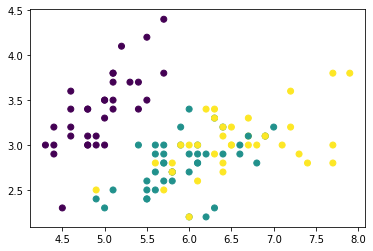

In [16]:
plt.scatter(X_train['sepal length (cm)'],X_train['sepal width (cm)'],c=y_train)
plt.show  #визуализируем дискриминантную линию по двум признакам(так как двумерное пространство) в зависимости от класса цветка c=y_train

In [17]:
lda.means_  # центроиды

array([[4.95151515, 3.39393939, 0.        ],
       [5.93571429, 2.78809524, 1.        ],
       [6.53513514, 3.00810811, 2.        ]])

In [18]:
from sklearn.linear_model import LogisticRegression # логистическая регрессия. Отличия от lda- в lr на вход может быть всё и категории тоже. Зависимая переменная подчиняется логистической функции
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)

array([0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0])

In [19]:
accuracy_score(y_test,lda.predict(X_test)) #точность lr модели 

0.868421052631579

# Кластеризация

In [35]:
# для кластеризации берем только признаки , целевую переменную игнорируем
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit_predict(data1) # fit_predict обучается на данных и каждому объекту присваивается кластер(использовали только столбцы sepal) 
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

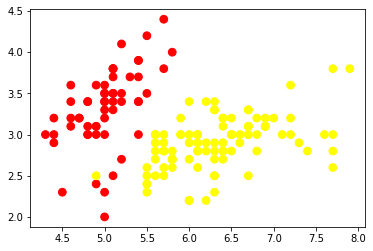

In [36]:
plt.scatter(data1['sepal length (cm)'],data1['sepal width (cm)'], cmap='autumn', c=clusters, s=60) # визуализируем 